# EDA and Feature Reduction of Breast Cancer Data Set

In [2]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../')))
os.chdir('../')

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

## Import local modules

In [4]:
from modules.get_df_for_preprocessing import GetDfForPreprocessing
from modules.get_df_info import describe
from modules.prep_data_for_model import get_target
from modules.create_viz import outliers_plot
from modules.xgboost_modeller import XgModeller

## Read data

In [5]:
df = pd.read_csv('data/data.csv')

In [6]:
prep = GetDfForPreprocessing(df=df)

In [7]:
prep.print_df_info()

Retrieving info from data...
The number of colum(s): 33.
The column(s) is/are : id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst and Unnamed: 32
 
The total number of rows: 569 
The number of columns having missing value(s): 1 
The number of rows with missing value(s) in [Unnamed: 32]: 569


## Drop columns with null values above threshold

In [8]:
non_na = prep.drop_cols_abv_na_trshld(threshold=0.3, output=True)


Comparing threshold with fraction of missing values ...

Retrieving columns to be dropped ...

Columns to be dropped : ['Unnamed: 32']

The column(s) to be excluded is/are [[]]

Dropping columns with missing values above the threshold ...

Dropping columns completed

Removing dropped columns from memory...

Removal of dropped columns from memory completed


## Get statistical description of data

In [9]:
non_na.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [10]:
describe(df=non_na)

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count   5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean    3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std     1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min     8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%     8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%     9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%     8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max     9.113205e+08    28.110000     39.280000      188.500000  2501.000000   
skew    6.473752e+00     0.942380      0.650450        0.990650     1.645732   
mad     4.779509e+07     2.751888      3.384965       19.032578   263.483384   
median  9.060240e+05    13.370000     18.840000       86.240000   551.100000   
kurt    4.219319e+01     0.845522      0.758319        0.972214     3.652303   

        smoothness_mean  compactness_mean  concavity_mean  \
count        569.000000        569.000000      569.000000   
mean           0.096360          0.104341        0.088799   
std            0.014064          0.052813        0.079720   
min            0.052630          0.019380        0.000000   
25%            0.086370          0.064920        0.029560   
50%            0.095870          0.092630        0.061540   
75%            0.105300          0.130400        0.130700   
max            0.163400          0.345400        0.426800   
skew           0.456324          1.190123        1.401180   
mad            0.011161          0.041105        0.062556   
median         0.095870          0.092630        0.061540   
kurt           0.855975          1.650130        1.998638   

        concave points_mean  symmetry_mean  ...  radius_worst  texture_worst  \
count            569.000000     569.000000  ...    569.000000     569.000000   
mean               0.048919       0.181162  ...     16.269190      25.677223   
std                0.038803       0.027414  ...      4.833242       6.146258   
min                0.000000       0.106000  ...      7.930000      12.020000   
25%                0.020310       0.161900  ...     13.010000      21.080000   
50%                0.033500       0.179200  ...     14.970000      25.410000   
75%                0.074000       0.195700  ...     18.790000      29.720000   
max                0.201200       0.304000  ...     36.040000      49.540000   
skew               1.171180       0.725609  ...      1.103115       0.498321   
mad                0.031460       0.021146  ...      3.789857       4.911825   
median             0.033500       0.179200  ...     14.970000      25.410000   
kurt               1.066556       1.287933  ...      0.944090       0.224302   

        perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count        569.000000   569.000000        569.000000         569.000000   
mean         107.261213   880.583128          0.132369           0.254265   
std           33.602542   569.356993          0.022832           0.157336   
min           50.410000   185.200000          0.071170           0.027290   
25%           84.110000   515.300000          0.116600           0.147200   
50%           97.660000   686.500000          0.131300           0.211900   
75%          125.400000  1084.000000          0.146000           0.339100   
max          251.200000  4254.000000          0.222600           1.058000   
skew           1.128164     1.859373          0.415426           1.473555   
mad           26.465437   423.879453          0.017956           0.119684   
median        97.660000   686.500000          0.131300           0.211900   
kurt           1.070150     4.396395          0.517825           3.039288   

        concavity_worst  concave points_worst  symmetry_worst  \
count        569.000000            569.000000      569.000000   
mean      

## Convert Target column to numerical

In [11]:
non_na['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [12]:
non_na['diagnosis'].replace('B',0,inplace=True)
non_na['diagnosis'].replace('M',1,inplace=True)

In [13]:
non_na.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [14]:
all_feats = non_na.columns

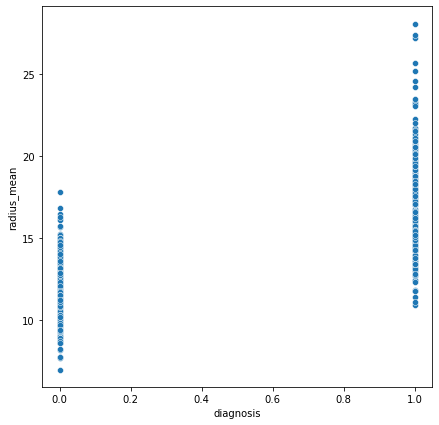

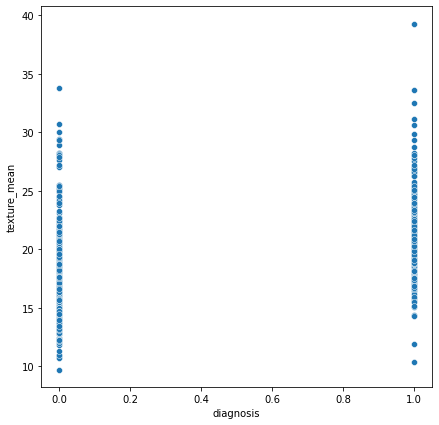

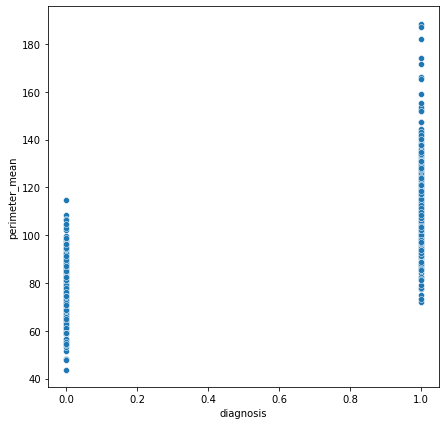

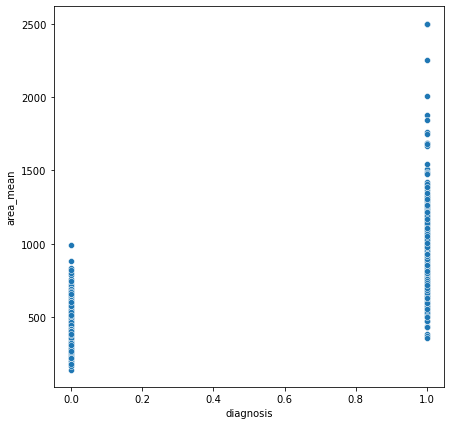

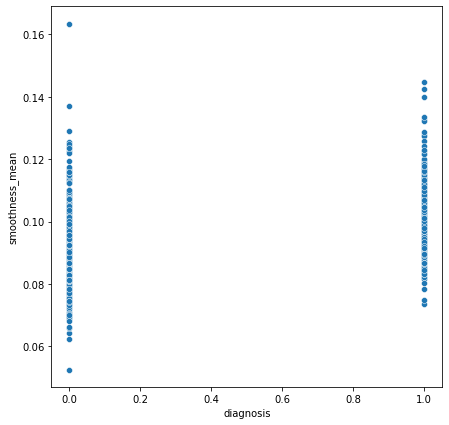

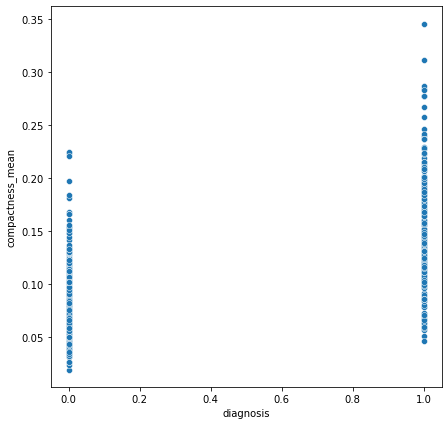

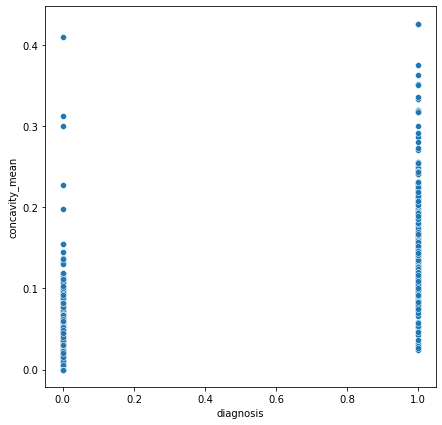

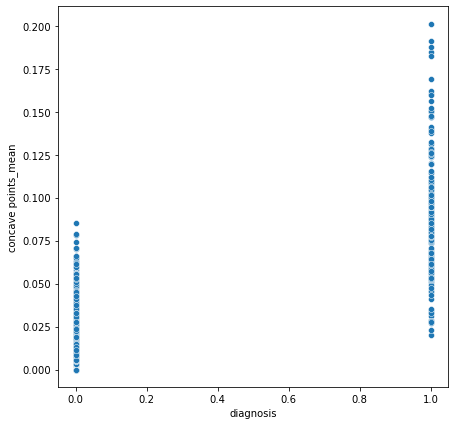

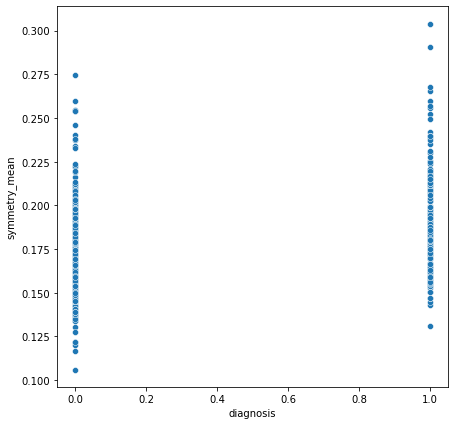

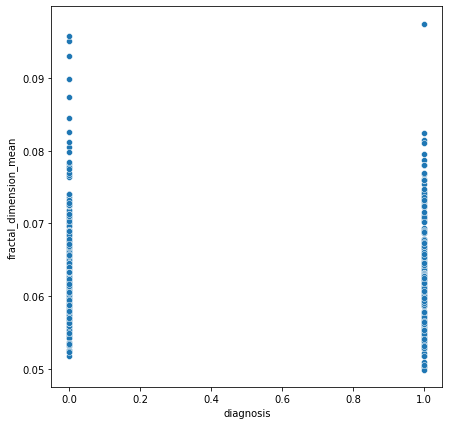

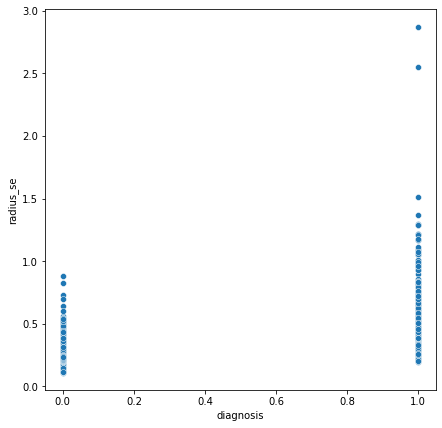

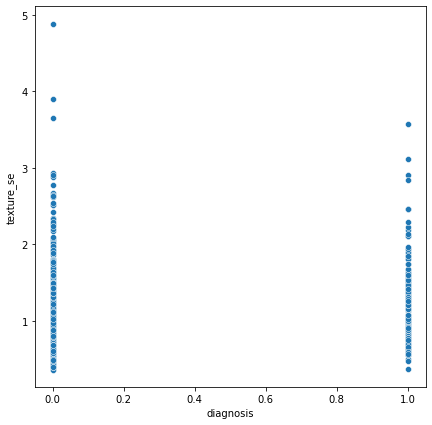

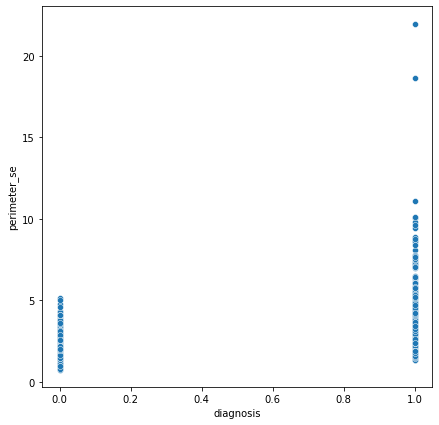

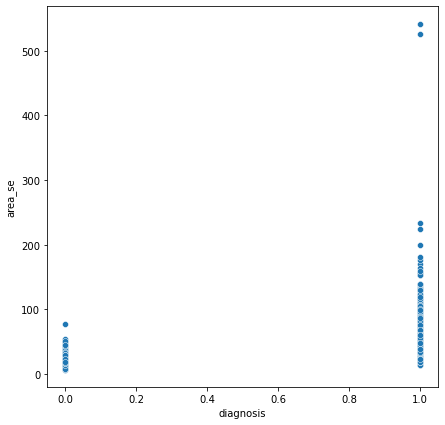

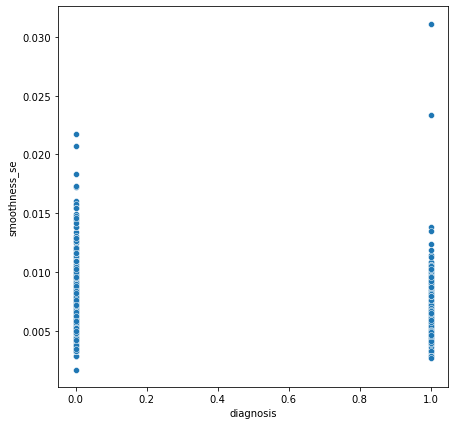

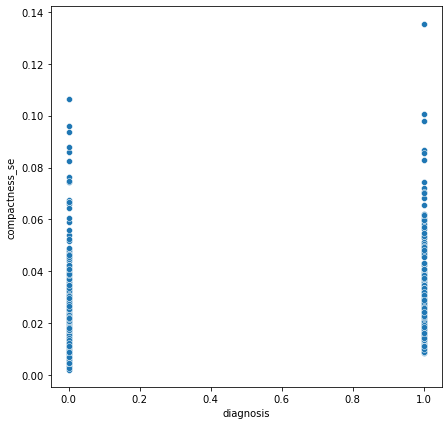

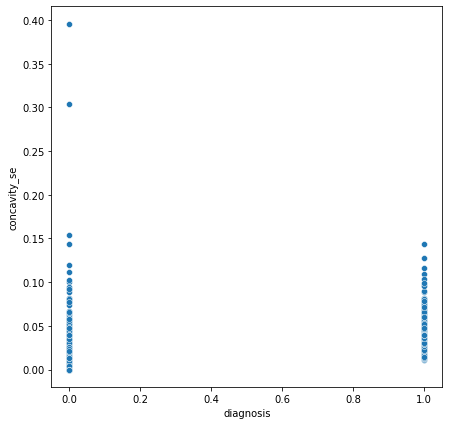

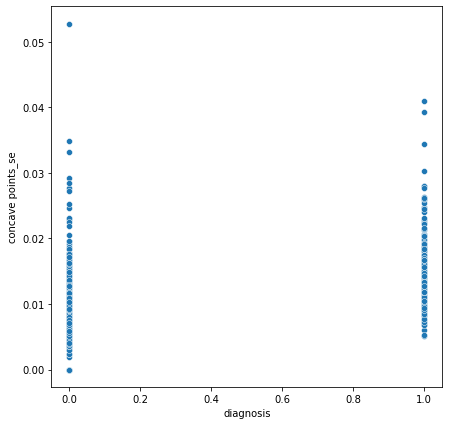

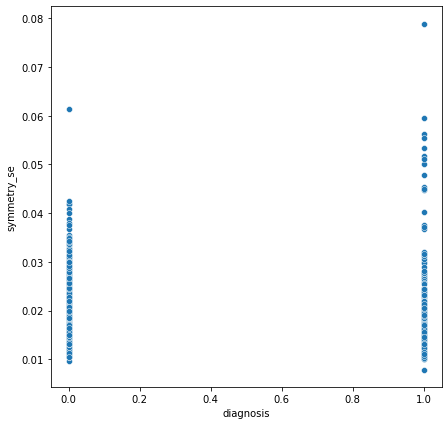

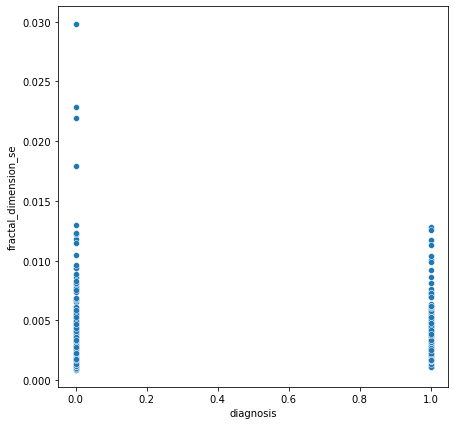

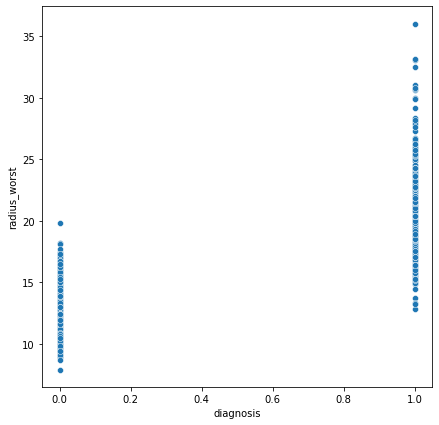

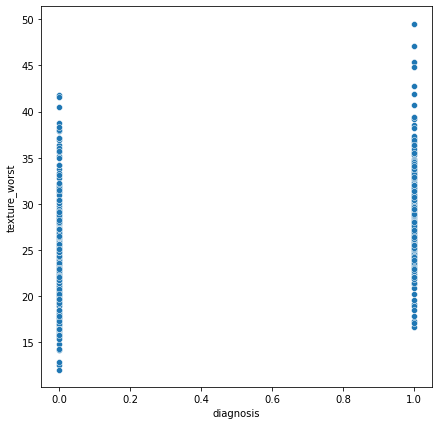

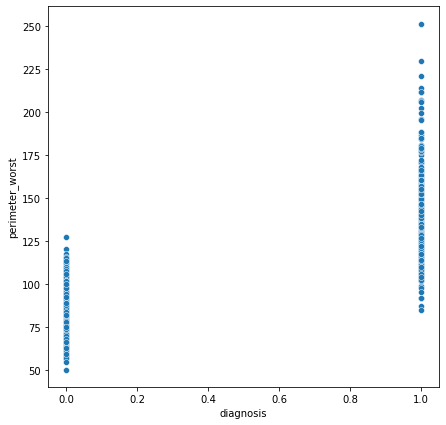

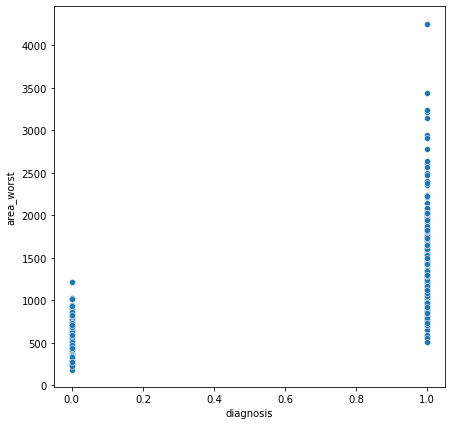

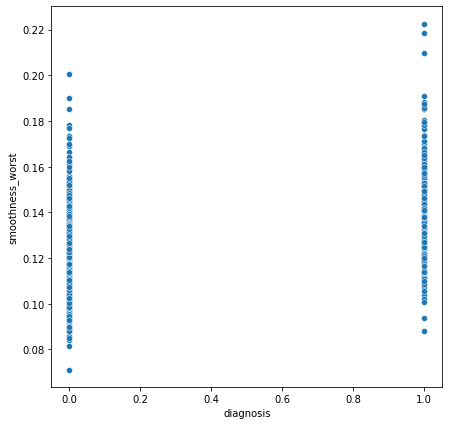

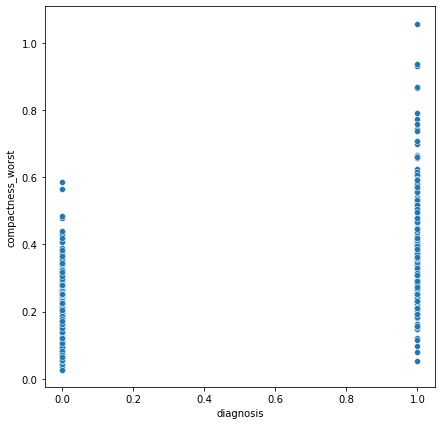

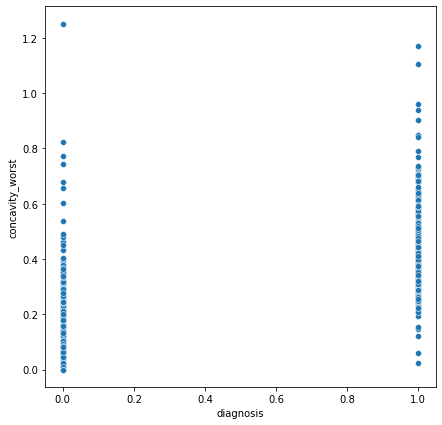

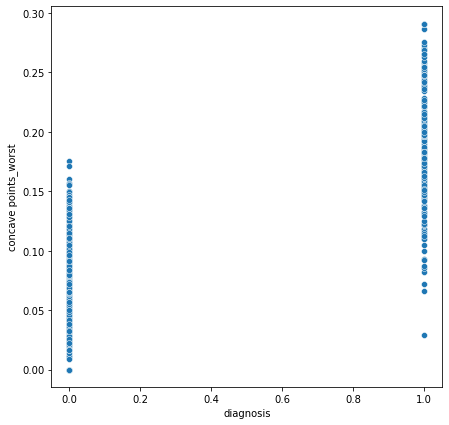

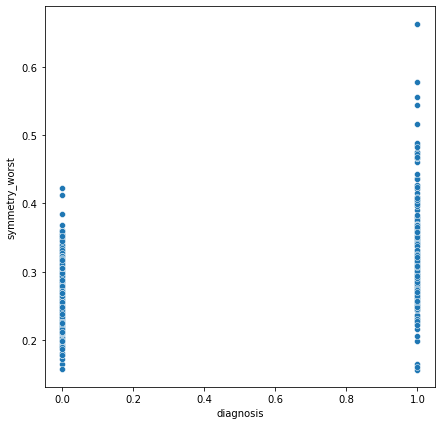

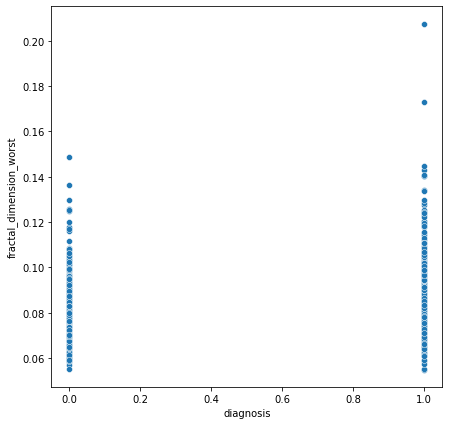

In [15]:
for col in all_feats[2:]:
    outliers_plot(df=non_na, labels={'x':'diagnosis', 'y':col})

In [16]:
thres = [25,31,175,2000,0.16,0.30,0.39,0.2,0.276,0.085,1.2,3.5,10,190,0.0175,0.1,0.15,0.03,0.06,0.015,35,45,225,3500,0.2,0.8,1,None,0.5,0.14]

In [17]:
non_na_outlr = non_na.copy()

In [18]:
for col,tshld in zip(all_feats[2:], thres):
    if tshld :
        av = non_na_outlr[col].mean()
        fltr = non_na_outlr[col] > tshld
        non_na_outlr[col][fltr] = av

<ipython-input-18-2e41490f424f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_outlr[col][fltr] = av
<ipython-input-18-2e41490f424f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_outlr[col][fltr] = av
<ipython-input-18-2e41490f424f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_outlr[col][fltr] = av
<ipython-input-18-2e41490f424f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [19]:
non_na_outlr.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0          0.162200           0.665600           0.7119                0.2654   
1          0.123800           0.186600           0.2416                0.1860   
2          0.144400           0.424500           0.4504                0.2430   
3          0.132369           0.254265           0.6869                0.2575   
4          0.137400           0.205000           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0        0.460100                 0.118900  
1        0.275000                 0.089020  
2        0.361300                 0.087580  
3        0.290076                 0.083946  
4        0.236400                 0.076780  

[5 rows x 32 columns]

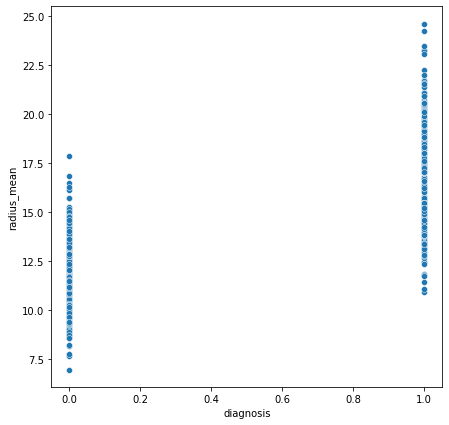

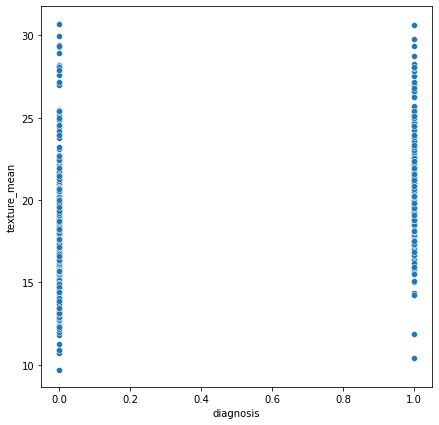

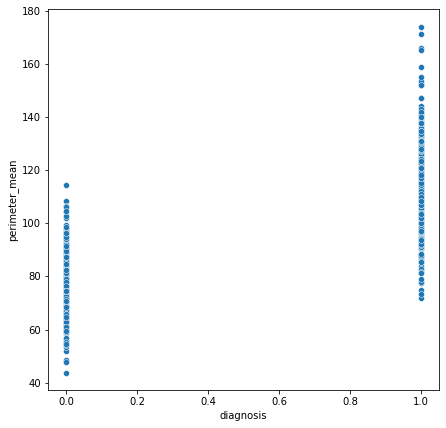

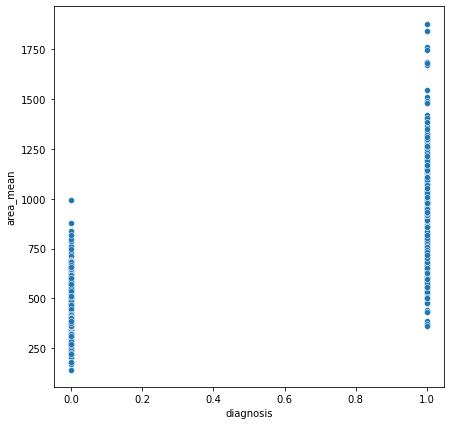

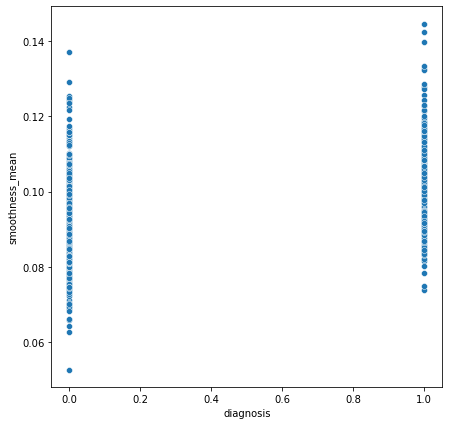

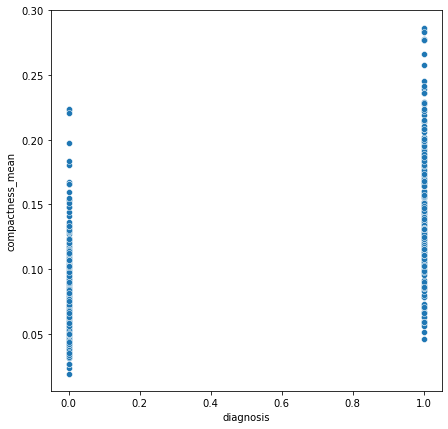

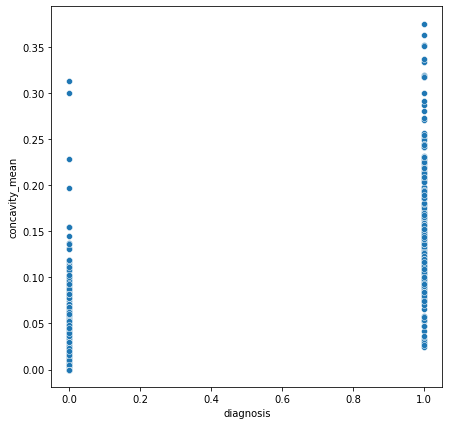

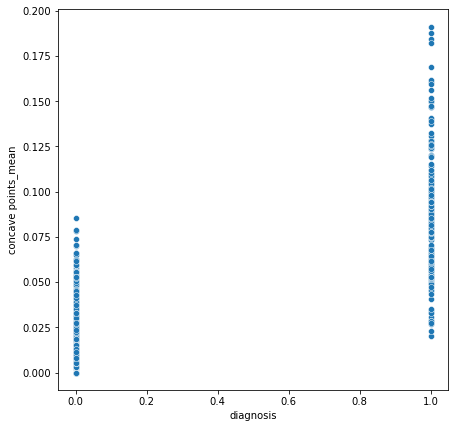

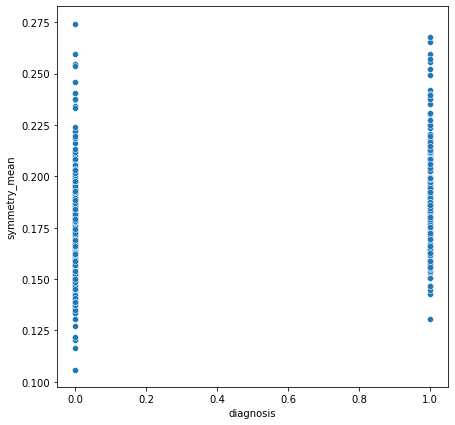

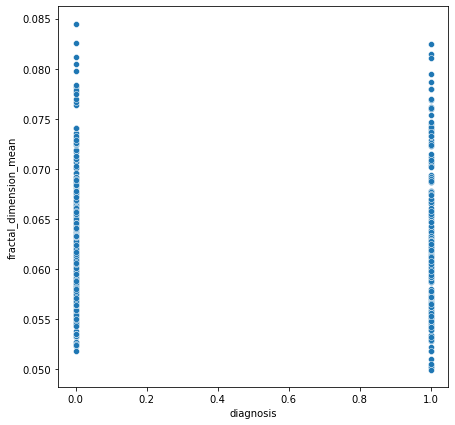

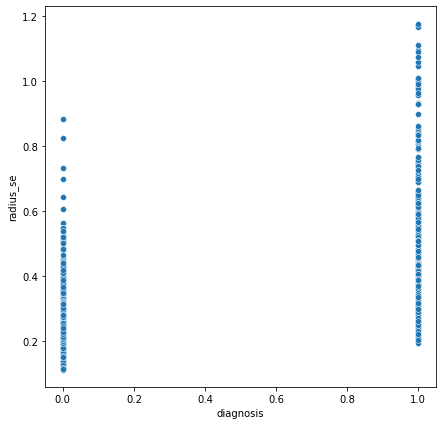

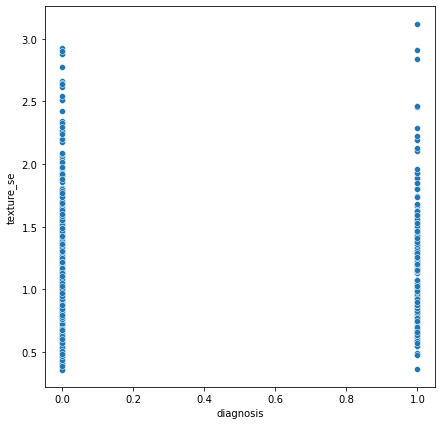

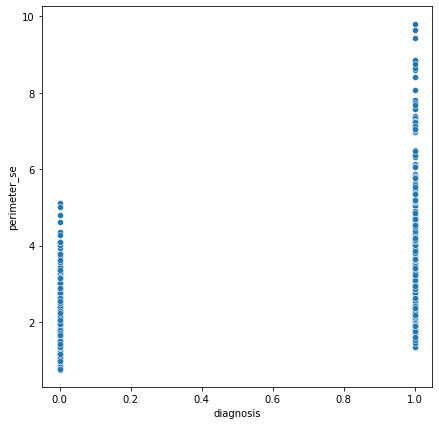

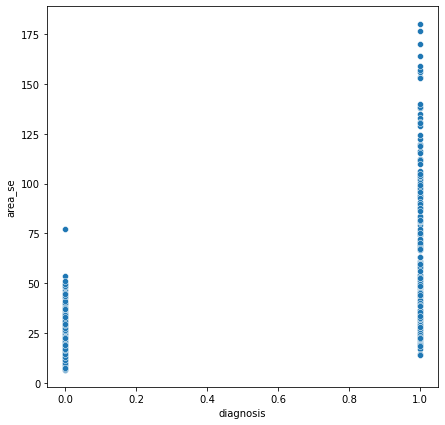

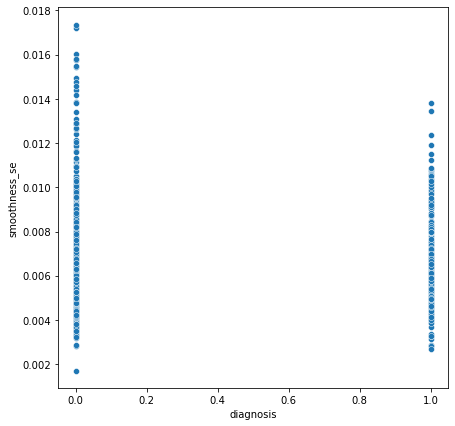

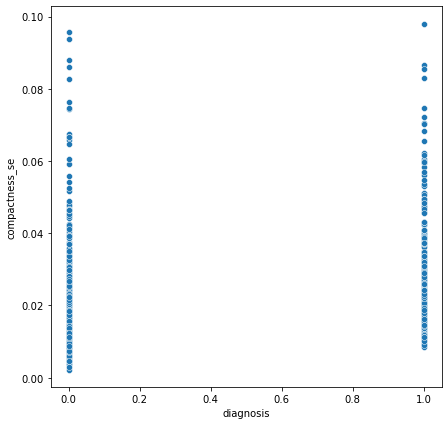

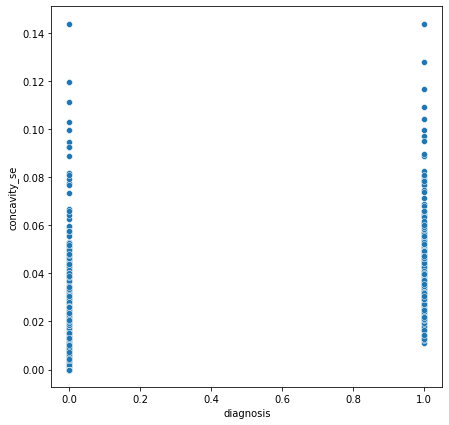

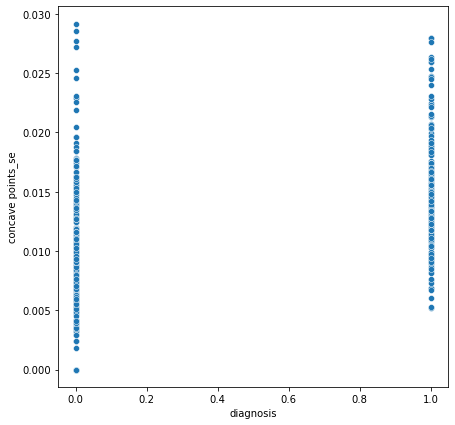

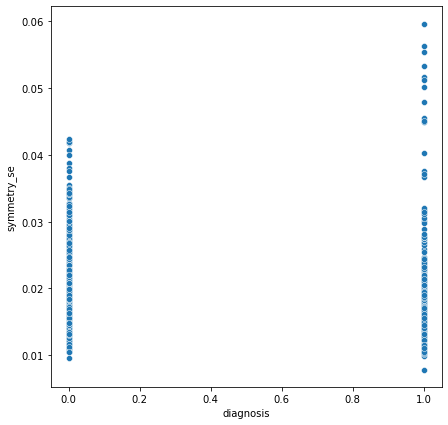

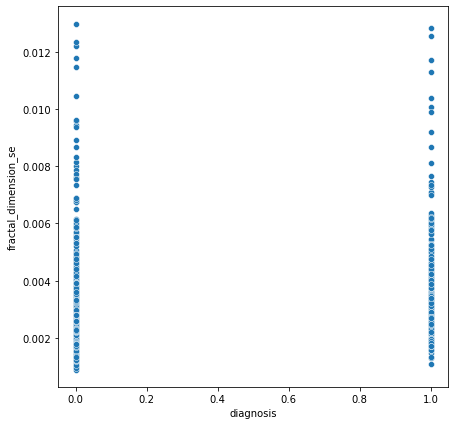

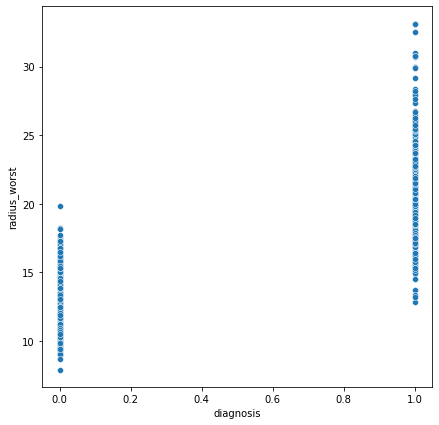

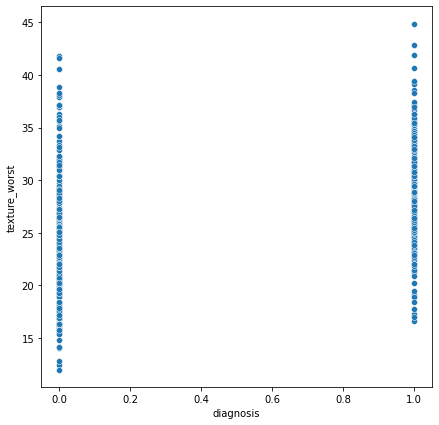

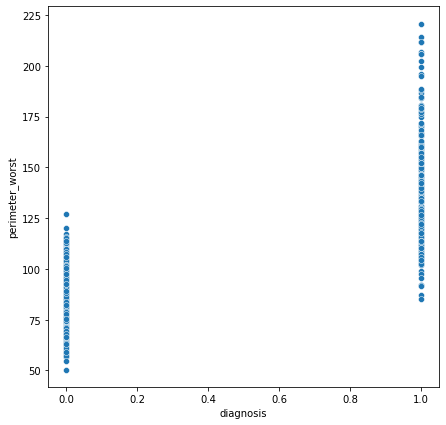

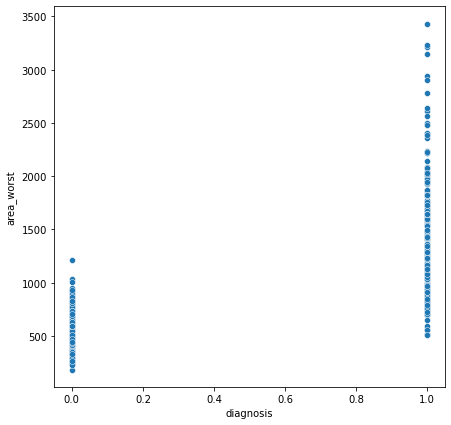

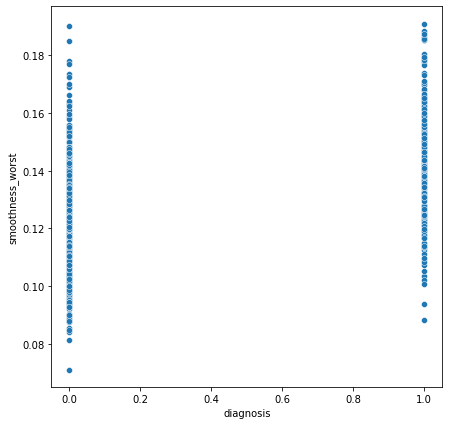

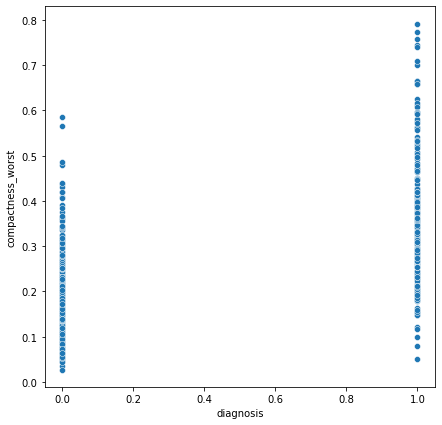

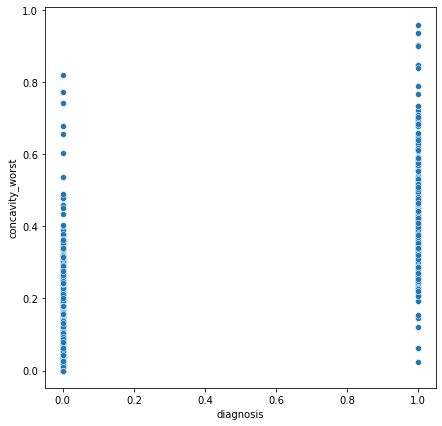

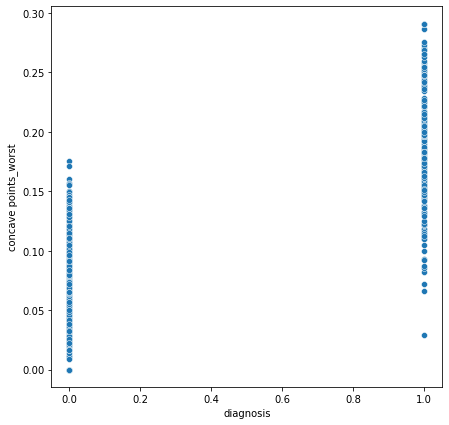

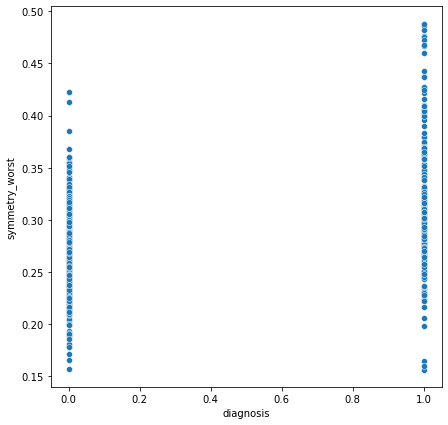

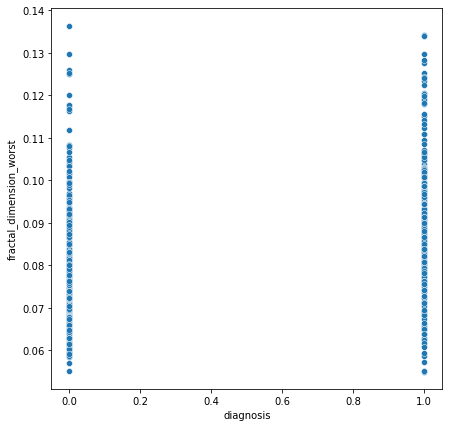

In [20]:
for col in all_feats[2:]:
    outliers_plot(df=non_na_outlr, labels={'x':'diagnosis', 'y':col})

## Drop id column

In [21]:
non_na.drop(columns=['id'], inplace=True)
non_na_outlr.drop(columns=['id'], inplace=True)

## Get Target(y)  and Data(x)

In [22]:
x_data, y_data = get_target(df=non_na, target_col='diagnosis')
xx_data, yy_data = get_target(df=non_na_outlr, target_col='diagnosis')

Retrieving the target variable...
Retrievial of the target variable completed. The data is returned in the order of:
data, target
Retrieving the target variable...
Retrievial of the target variable completed. The data is returned in the order of:
data, target


In [23]:
x_data.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [24]:
xx_data.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.078710  ...         25.38          17.33           184.60   
1                0.056670  ...         24.99          23.41           158.80   
2                0.059990  ...         23.57          25.53           152.50   
3                0.062798  ...         14.91          26.50            98.87   
4                0.058830  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0          0.162200           0.665600           0.7119   
1      1956.0          0.123800           0.186600           0.2416   
2      1709.0          0.144400           0.424500           0.4504   
3       567.7          0.132369           0.254265           0.6869   
4      1575.0          0.137400           0.205000           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654        0.460100                 0.118900  
1                0.1860        0.275000                 0.089020  
2                0.2430        0.361300                 0.087580  
3                0.2575        0.290076                 0.083946  
4                0.1625        0.236400                 0.076780  

[5 rows x 30 columns]

In [25]:
y_data.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [26]:
yy_data.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

## Get feature list

In [27]:
feats = x_data.columns

## Normalize features

In [28]:
scaled_xx_data = pd.DataFrame(StandardScaler().fit_transform(xx_data), columns=feats)

In [29]:
scaled_xx_data.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.199347     -2.163606        1.344734   1.110371         1.609428   
1     1.978077     -0.342522        1.778300   2.119005        -0.835489   
2     1.712463      0.515039        1.653811   1.737276         0.970234   
3    -0.783698      0.300648       -0.596438  -0.797965         3.359948   
4     1.893563     -1.187761        1.872740   2.029004         0.294722   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.409278        2.807794             2.574586       2.307019   
1         -0.488012       -0.001925             0.562743       0.016841   
2          1.103734        1.454332             2.072475       0.986488   
3          3.532684        2.034199             1.478834       2.978603   
4          0.572891        1.462239             1.455297       0.005522   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                2.570607  ...      1.922465      -1.387630         2.384921   
1               -0.919885  ...      1.840484      -0.362858         1.594098   
2               -0.394094  ...      1.541989      -0.005537         1.400990   
3                0.050549  ...     -0.278408       0.157955        -0.242880   
4               -0.577804  ...      1.325475      -1.498872         1.391794   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.076983          1.396118           2.908170         2.247746   
1    1.962639         -0.367563          -0.430022        -0.130599   
2    1.514334          0.578578           1.227923         0.925319   
3   -0.557121          0.025986           0.041541         2.121319   
4    1.271125          0.257074          -0.301791         0.670443   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              2.296076        3.099852                 2.320977  
1              1.087084       -0.226471                 0.397207  
2              1.955000        1.324376                 0.304495  
3              2.175786        0.044444                 0.070515  
4              0.729259       -0.920128                -0.390844  

[5 rows x 30 columns]

In [86]:
def heat_cor(df, fig_size, title, save_path=None):
    '''Plots an annotated heat map with correlation matrix. Takes df(dataframe) and fig_size a tuple of x-lenght and y-length
    title title of plot and save_path path to save plot'''
    plt.figure(figsize=fig_size)
    mask = np.triu(np.ones_like(df.corr()))
    heat_map = sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap='BrBG', fmt='.2f', mask=mask)
    heat_map.set_title(title, fontdict={'fontsize':18}, pad=16)
    if save_path:
        plt.savefig(save_path)
        print("Plot saved")

In [103]:
rel_df = xx_data.copy()
rel_df['diagnosis'] = yy_data

In [104]:
rel_df.to_csv('data/cleaned_data.csv', index=False)

Plot saved


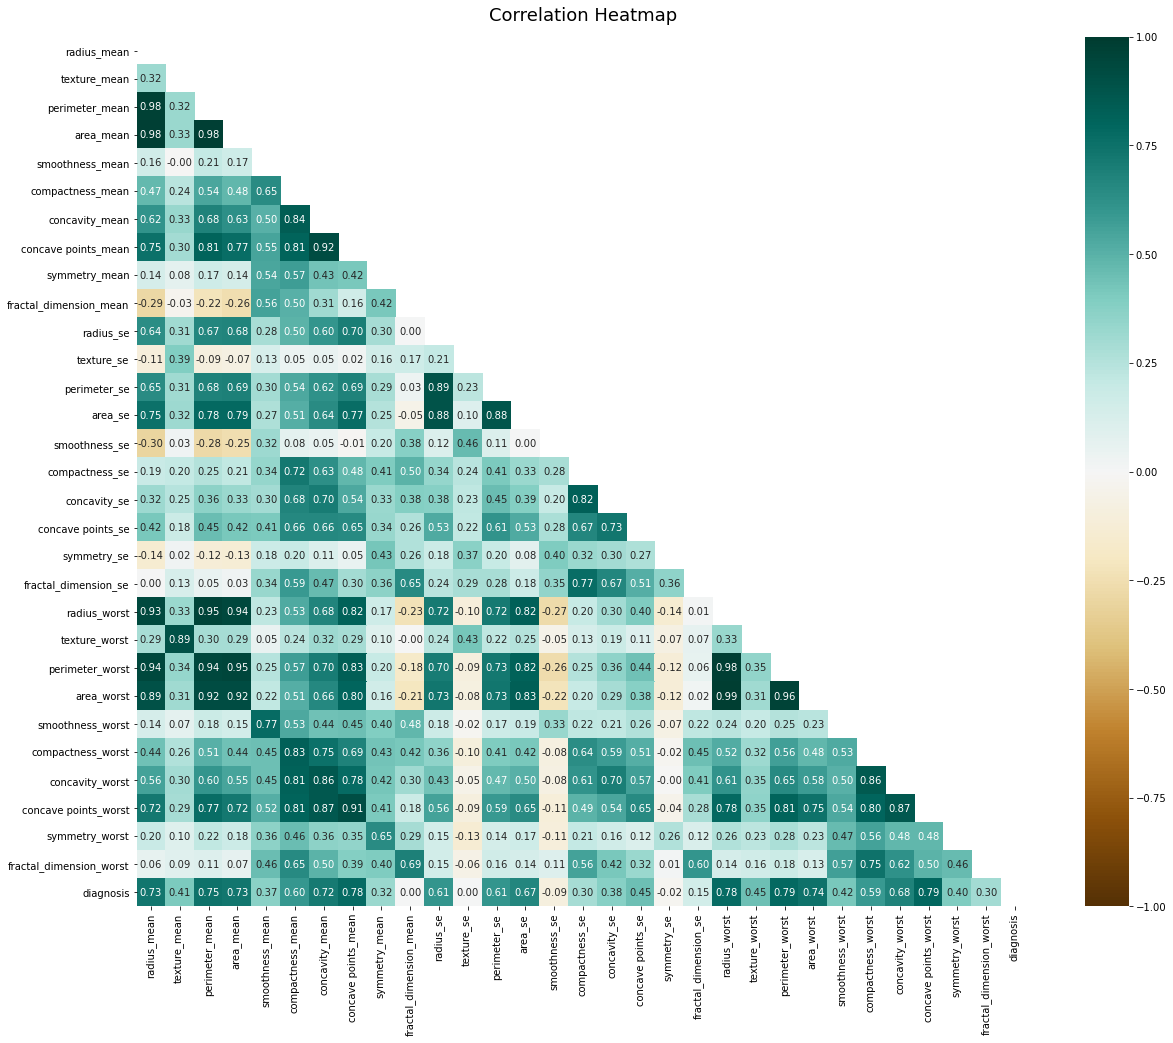

In [97]:
heat_cor(df=rel_df, fig_size=(20, 16), title="Correlation Heatmap", save_path='img/cor_heat.jpg', )

## XGB Model to extract important features

In [30]:
mdlr = XgModeller()

2021-08-28 09:49:31,855 - XgModeller initialized...


In [34]:
base, best = mdlr.gridsearch_model(X=xx_data, Y=yy_data, output=True) #use data with no outliers

2021-08-28 09:49:53,664 - Randomized+SearchCV in process, 'n_estimators'=15 ...
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[09:49:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=20, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6; total time=   0.4s
[09:49:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=20, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6; total time=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:49:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=20, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6; total time=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:49:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=20, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6; total time=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:49:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=20, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6; total time=   1.2s
[09:49:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=20, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6; total time=   0.1s
[09:49:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=20, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6; total time=   0.6s
[09:49:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=20, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6; total time=   0.1s
[09:49:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=20, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6; total time=   0.2s
[09:49:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=20, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.6; total time=   0.1s
[09:49:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95; total time=   0.7s
[09:49:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95; total time=   0.2s
[09:49:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95; total time=   0.2s
[09:49:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95; total time=   0.8s
[09:50:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.01, reg_lambda=0.01, subsample=0.95; total time=   0.3s
[09:50:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6; total time=   0.2s
[09:50:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6; total time=   0.6s
[09:50:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6; total time=   0.1s
[09:50:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6; total time=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:50:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, gamma=0.03, learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=0.01, reg_lambda=0.45, subsample=0.6; total time=   0.1s
[09:50:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=20, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95; total time=   0.1s
[09:50:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=20, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95; total time=   0.4s
[09:50:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=20, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95; total time=   0.1s
[09:50:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=20, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95; total time=   0.1s
[09:50:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.07, max_depth=5, min_child_weight=1.5, n_estimators=20, reg_alpha=0.75, reg_lambda=0.45, subsample=0.95; total time=   0.1s
[09:50:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95; total time=   0.3s
[09:50:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:50:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95; total time=   0.1s
[09:50:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95; total time=   0.1s
[09:50:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=0.75, reg_lambda=1e-05, subsample=0.95; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:50:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=20, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95; total time=   0.1s
[09:50:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=20, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95; total time=   0.2s
[09:50:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:l

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:50:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=20, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95; total time=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:50:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=20, reg_alpha=1e-05, reg_lambda=0.01, subsample=0.95; total time=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:50:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6; total time=   0.1s
[09:50:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6; total time=   0.1s
[09:50:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6; total time=   0.2s
[09:50:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=0.75, reg_lambda=0.01,

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:50:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=20, reg_alpha=0.75, reg_lambda=0.01, subsample=0.6; total time=   0.1s
[09:50:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95; total time=   0.1s
[09:50:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95; total time=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:50:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95; total time=   0.1s
[09:50:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95; total time=   0.1s
[09:50:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logis

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=5, min_child_weight=6, n_estimators=20, reg_alpha=1e-05, reg_lambda=0.45, subsample=0.95; total time=   0.1s
[09:50:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0.03, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=20, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6; total time=   0.1s

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[09:50:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0.03, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=20, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6; total time=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:50:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0.03, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=20, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6; total time=   0.0s
[09:50:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0.03, learning_rate=0.07, max_depth=3, min_child_weight=10, n_estimators=20, reg_alpha=1e-05, reg_lambda=1e-05, subsample=0.6; total time=   0.1s
[09:50:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'bina

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:50:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


2021-08-28 09:50:10,178 - RandomizedSearchCV in completed
2021-08-28 09:50:10,183 - Best_estimator in retrieved


In [35]:
best_params = best.get_xgb_params()

2021-08-28 09:51:14,016 - Feature importance plotting in process...


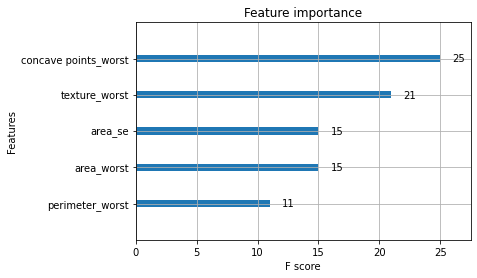

In [39]:
mdlr.best_feature_imp(max_feats=5)

## From XGBClassifier the top two important features are (concave points_worst and texture_worst)

In [39]:
impnt_feats_df = xx_data[['concave points_worst', 'texture_worst']].copy()

In [40]:
impnt_feats_df['diagnosis']=yy_data

In [41]:
impnt_feats_df

concave points_worst  texture_worst  diagnosis
0                  0.2654          17.33          1
1                  0.1860          23.41          1
2                  0.2430          25.53          1
3                  0.2575          26.50          1
4                  0.1625          16.67          1
..                    ...            ...        ...
564                0.2216          26.40          1
565                0.1628          38.25          1
566                0.1418          34.12          1
567                0.2650          39.42          1
568                0.0000          30.37          0

[569 rows x 3 columns]

In [99]:
import dowhy
from causalgraphicalmodels import CausalGraphicalModel